<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/Week13_GPCP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [5]:
ds = xr.open_dataset("/content/drive/MyDrive/Colab_data/GPCP_V2.3_197901-202203.nc")

ds = ds.sel(time=slice('1979', '2019'))
ds.load()
ds

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 492)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1305 0.1327 0.1341
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/02 through latest.

In [24]:
ds_clim = ds.precip.groupby('time.month').mean(dim='time')
ds_anom = ds.precip.groupby('time.month') - ds_clim

In [29]:
ds_EP = ds_anom.sel(lat=slice(10, 40), lon=slice(118, 125))
ds_EP_mean = ds_EP.mean(dim=('lon'))
ds_EP_mean

<xarray.DataArray 'precip' (time: 492, lat: 12)>
array([[-1.8304399 , -2.7650568 , -1.1986276 , ...,  0.07888955,
         0.20738263,  0.16849566],
       [-0.594117  , -1.2946658 , -0.19637303, ..., -0.67595416,
         0.16070807,  0.35814962],
       [-1.272844  , -1.8792046 , -1.1649028 , ...,  0.23229039,
         0.4269587 ,  0.10854437],
       ...,
       [-2.5275528 , -4.2792654 , -5.713163  , ..., -0.08351576,
        -0.16408175, -0.69721967],
       [-0.6870683 , -1.2320386 ,  2.1706564 , ..., -0.61719704,
         0.13457607,  0.5771142 ],
       [ 0.5435641 , -0.380239  ,  1.6379472 , ...,  0.6646393 ,
         0.04853059,  0.22506635]], dtype=float32)
Coordinates:
  * lat      (lat) float32 11.25 13.75 16.25 18.75 ... 31.25 33.75 36.25 38.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [30]:
# 获取时间并创建日期时间对象数组
vtimes = ds_EP_mean.time.values.astype('datetime64[ms]').astype('O')

# 指定所选域的经度值
lats = ds_EP_mean.lat.values

Text(1.0, 1.0, 'Time Range: 19790101 00Z - 20191201 00Z')

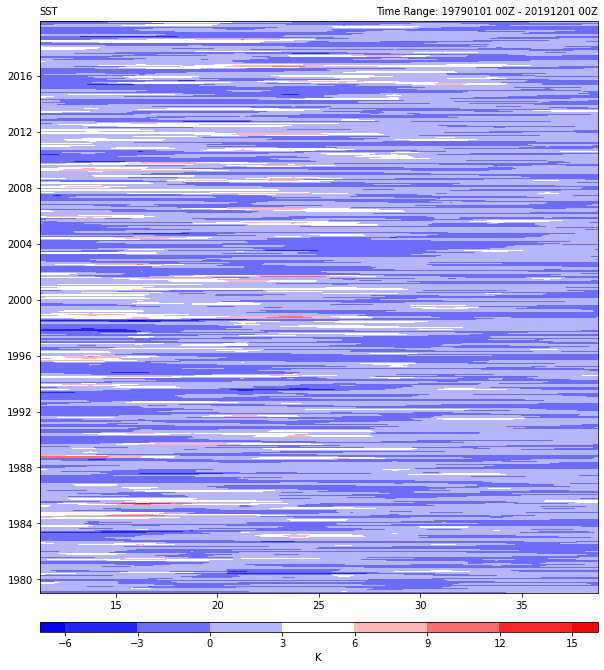

In [31]:
fig = plt.figure(figsize=(10, 13))

ax = fig.add_subplot(111)
#ax.invert_yaxis()  # invert time

clevs = np.arange(10, 15, 1)

#smoothed
#cf = ax.contourf(lats, vtimes, mpcalc.smooth_n_point(ds_EP_mean['sst'], 9, 2), clevs, cmap=plt.cm.bwr, extend='both')

#not smoothed
cf = ax.contourf(lats, vtimes, ds_EP_mean, cmap=plt.cm.bwr, extend='both')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
cbar.set_label('K')
#ax.set_yticks(vtimes[4::8])
#ax.set_yticklabels(vtimes[4::8])

plt.title('SST', loc='left', fontsize=10)
plt.title('Time Range: {0:%Y%m%d %HZ} - {1:%Y%m%d %HZ}'.format(vtimes[0], vtimes[-1]),
          loc='right', fontsize=10)

# 新增區段